# Assignment 2

In [1]:
# Importing Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import torch
import torch.distributions as dist
import torch.optim as optim

---
### Q2 [1.5 marks]

You toss a coin 10 times and the result turns out to be: [1, 0, 0, 1, 1, 0, 1, 0, 0, 0]. Find the MAP estimate for probability of heads if:
1) Prior is Beta distribution with parameters (alpha=2, beta=3):

a) Calculate the answer analytically using the closed form MAP estimate [0.5 mark]

b)Find the answer with gradient descent using torch.optim [0.5 mark]


#### A2.1.a) Closed form MAP estimate

**Prior**

The expression for the beta distribution for ($\alpha = 2$, $\beta = 3$)

\begin{align}
p(x) & \propto x^{\alpha - 1} (1 - x)^{\beta - 1} \\
     & \propto x (1 - x)^{2} \\
\end{align}

Here x in the prior, is the probability *p* of getting a head in a single toss. (Note: Here we need not take the constant into account as it does not impact the Maxima of the function.)

**Likelihood**

The expression for the likelihood is a Binomial distribution for ($N = 10$ tosses):

$$
D = \{ 1, 0, 0, 1, 1, 0, 1, 0, 0, 0  \}
$$

We have 4 heads and 6 tails

\begin{align}
p(D|x) & = \binom{N}{H} x^{H} (1 - x)^{N-H} \\
       & = \binom{10}{4} x^{4} (1 - x)^{6} \\
       & \propto x^{4} (1 - x)^{6} \\
\end{align}

**Posterior**

According to Bayes theorem, the posterior distribution is given by

\begin{align}
p(x|D) & = \frac{p(D|x) p(x)}{p(D)} \\
       & \propto p(D|x) p(x) \\
       & \propto x^{4} (1 - x)^{6} x (1 - x)^{2} \\
       & \propto x^{5} (1 - x)^{8} \\
\end{align}

To get the MAP estimate, we need to find the value of x (prob of Heads) that maximizes the posterior distribution. We can do this by taking the derivative of the posterior distribution and equating it to zero.

\begin{align}
& \frac{d}{dx} p(x|D) & = 0 \\
& \frac{d}{dx} x^{5} (1 - x)^{8} & = 0 \\
& 5 x^{4} (1 - x)^{8} - 8 x^{5} (1 - x)^{7} & = 0 \\
& x^{4} (1 - x)^{7} (5 - 13 x) & = 0 \\
\end{align}

This leads to the MAP solution being **$x = \frac{5}{13} $**

Also, the Solution of this Question is $\frac{H+\alpha -1}{N+(\alpha-1) + (\beta-1) }$ = $\frac{4+2-1}{10 + (2-1) + (3-1)} = \frac{5}{13}$



#### A2.1.b) Gradient Descent using torch.optim

Function to be optimised = $p(x|D) \propto p(D|x) p(x) =  x^4(1-x)^6 * x(1-x)^2$

Note: We are only considering the posterior between 0 to 1. When minimising the function, we require a large learning Rate as the gradients are very small, also a large number of iterations are required to reach the minima. For minimising the log function, the gradient can get very big, and overshoot beyond 1 and then go downhill from there, so we need to make sure, we start with small learning rate and then increase it as we go along, so that we are converging to the local minima.

Optimized x: 0.38461753726005554


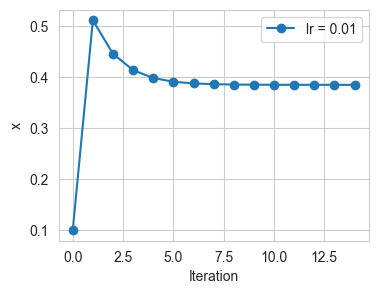

In [39]:
# Define the function to be minimized
def log_func(x):
    # return -(x**5)*((1-x)**8)
    # return -torch.log((x**5)*((1-x)**8))
    return -torch.log((x**4)*((1-x)**6)) - torch.log((x**1)*((1-x)**2))

# Initialize the variable to optimize (parameter)
x = torch.tensor(0.1, requires_grad=True)

# Define the optimizer (using stochastic gradient descent)
lr = 0.01
optimizer = optim.SGD([x], lr = lr)  # lr is the learning rate
xhist = []

# Perform optimization
for _ in range(15):         # Number of optimization steps
    xhist.append(x.item())  # Record the parameter value
    optimizer.zero_grad()   # Zero out gradients
    loss = log_func(x)      # Compute the loss
    loss.backward()         # Compute gradients
    optimizer.step()        # Update the parameter using the gradients

# The optimized value of x is the minimum point of the function
min_x = x.item()
min_value = func(x).item()

print("Optimized x:", min_x)
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(xhist, 'o-', label= "lr = " + str(lr)); ax.set_xlabel('Iteration'); ax.set_ylabel('x')
ax.legend()
plt.show()

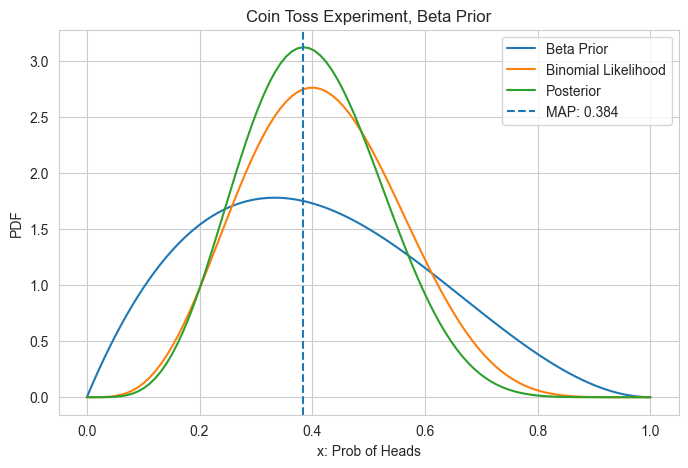

In [46]:
x = np.linspace(0, 1, 100)
alpha = 2
beta = 3
beta23 = lambda x : (x**(2-1))*((1-x)**(3-1))
bin_lik = lambda x : (x**(4))*((1-x)**(6))
pr = beta23(x)
lik = bin_lik(x)
post = pr*lik

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, pr/(pr.sum())/(x[1]-x[0]), label = "Beta Prior")
ax.plot(x, lik/(lik.sum())/(x[1]-x[0]), label = "Binomial Likelihood")
ax.plot(x, post/(post.sum())/(x[1]-x[0]), label = "Posterior")
ax.axvline(x[np.argmax(post)], linestyle = '--', label = "MAP: " + str(round(x[np.argmax(post)], 3)) )
ax.legend(loc='best')
ax.set_title('Coin Toss Experiment, Beta Prior')
ax.set_xlabel('x: Prob of Heads')
ax.set_ylabel('PDF')
plt.show()

ii) Prior is a Gaussian distribution with mean=0.5 and variance=0.1. Find the answer with gradient descent using torch.optim [0.5 mark]

We can take the gaussian prior as 

$$
p(x) \propto e^{-\frac{(x - \mu)^2}{2 \sigma^2}}\\
log(p(x)) \propto -\frac{(x - \mu)^2}{2 \sigma^2}
$$

Optimized x: 0.4714


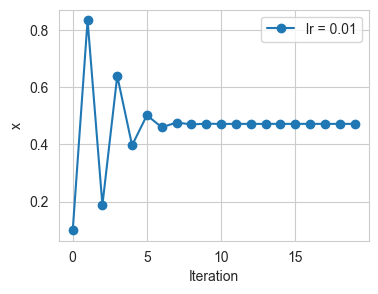

In [51]:
# Define the function to be minimized
def log_func(x):
    return -torch.log((x**4)*((1-x)**6)) + (x-0.5)**2/(2*0.1**2) #torch.log((x**1)*((1-x)**2))

# Initialize the variable to optimize (parameter)
x = torch.tensor(0.1, requires_grad=True)

# Define the optimizer (using stochastic gradient descent)
lr = 0.01
optimizer = optim.SGD([x], lr = lr)  # lr is the learning rate
xhist = []

# Perform optimization
for _ in range(20):         # Number of optimization steps
    xhist.append(x.item())  # Record the parameter value
    optimizer.zero_grad()   # Zero out gradients
    loss = log_func(x)      # Compute the loss
    loss.backward()         # Compute gradients
    optimizer.step()        # Update the parameter using the gradients

# The optimized value of x is the minimum point of the function
min_x = x.item()
min_value = func(x).item()

print("Optimized x:", round(min_x,4))
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(xhist, 'o-', label= "lr = " + str(lr)); ax.set_xlabel('Iteration'); ax.set_ylabel('x')
ax.legend()
plt.show()

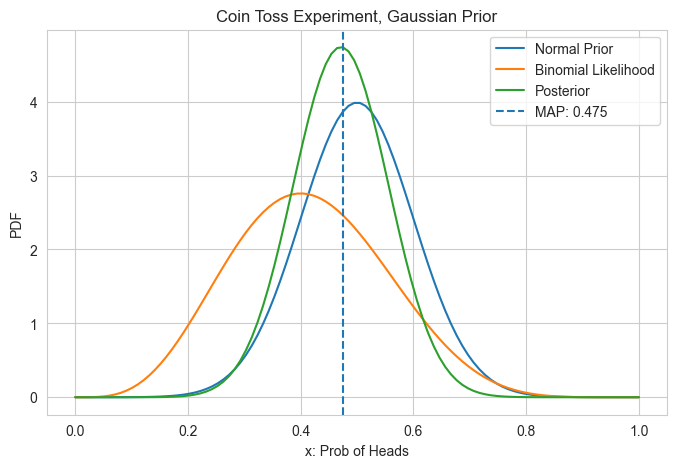

In [45]:
x = np.linspace(0, 1, 100)
alpha = 2
beta = 3
gauss = lambda x : np.exp(-(x-0.5)**2/(2*0.1**2)) #(x**(2-1))*((1-x)**(3-1))
bin_lik = lambda x : (x**(4))*((1-x)**(6))
pr = gauss(x)
lik = bin_lik(x)
post = pr*lik

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x, pr/(pr.sum())/(x[1]-x[0]), label = "Normal Prior")
ax.plot(x, lik/(lik.sum())/(x[1]-x[0]), label = "Binomial Likelihood")
ax.plot(x, post/(post.sum())/(x[1]-x[0]), label = "Posterior")
ax.axvline(x[np.argmax(post)], linestyle = '--', label = "MAP: " + str(round(x[np.argmax(post)], 3)) )
ax.legend(loc='best')
ax.set_title('Coin Toss Experiment, Gaussian Prior')
ax.set_xlabel('x: Prob of Heads')
ax.set_ylabel('PDF')
plt.show()

### Q3 [2.5]

Generate a linear trend dataset with the following code (3.1). Find MAP estimate for slope and intercept:

i) Prior is Normal distribution with mean=0 and variance=1 [1 marks]

ii) Show the effect of varying the size of the dataset on the MAP estimate [0.5 mark]

iii)Show the effect of varying the prior variance on the MAP estimate [0.5 mark]

iv) Change the prior to Laplace with mean = 0 and scale = 1. Compare the MAP estimate with the one obtained in (i). What do you observe? [0.5 mark]


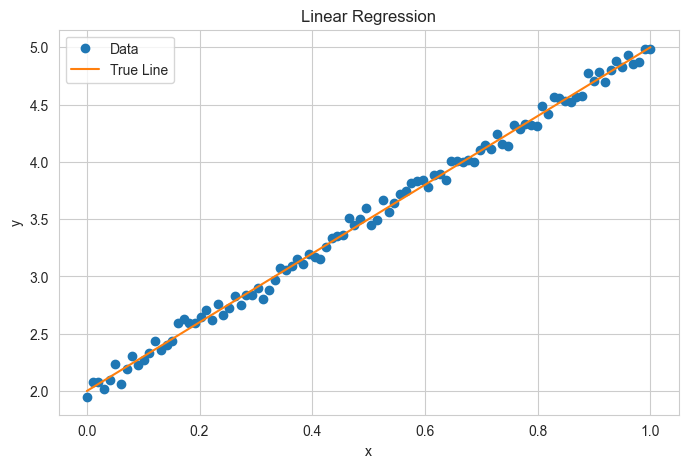

In [2]:
np.random.seed(123)
slope = 3
intercept = 2
N = 100
X = np.linspace(0, 1, N)
noise = np.random.normal(0, 0.05, N)
y = slope * X + intercept + noise
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(X, y, 'o', label = "Data")
ax.plot(X, slope*X + intercept, label = "True Line")
ax.legend(loc='best')
ax.set_title('Linear Regression')
ax.set_xlabel('x'); ax.set_ylabel('y')
plt.show()

In [9]:
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

torch.Size([100]) torch.Size([100])


Finding a Map estimate for the parameters slope(m) and intercept(c) (for $\sigma = 1$):

**Model:** (likelihood)

\begin{align}
p(y|x, \theta) &= \mathcal{N}(y|mx + c, \sigma^2) \\
log(p(y|x, \theta)) &= -\frac{1}{2} \sum_{i=1}^{N} \frac{(y_i - mx_i - c)^2}{\sigma^2} \\
log(p(y|x, \theta)) &= -\frac{1}{2} (y - X\theta)^T (y - X\theta)
\end{align}

Here, $\sigma$ is also a part of the model and ideally we should have a prior for that also to do a complete Bayesian Analysis of the problem. Here, we will assume sigma = 1.0 and not consider it as a part of the model..


**Prior:**

A normal distribution with mean 0 and variance 1.

\begin{align}
p(\theta) &= \mathcal{N}(\theta|0, 1) \\
log(p(\theta)) &= -\frac{1}{2} \sum_{i=1}^{N} \frac{\theta_i^2}{1} \\
log(p(\theta)) &= -\frac{1}{2} \theta^T \theta
\end{align}

**Posterior:**

\begin{align}
p(\theta|y, x) &= \frac{p(y|x, \theta) p(\theta)}{p(y|x)} \\
log(p(\theta|y, x)) & \propto log(p(y|x, \theta)) + log(p(\theta)) \\
log(p(\theta|y, x)) & \propto -\frac{1}{2 } (y - X\theta)^T (y - X\theta) -\frac{1}{2} \theta^T \theta  \\
\end{align}


Optimized x: tensor([2.7747, 2.0939], requires_grad=True) Loss:  6.43947172164917


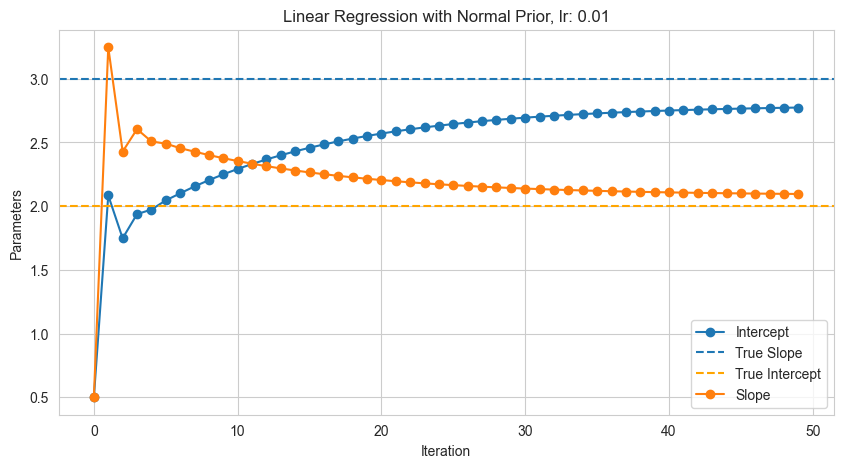

In [31]:
# Posterior function to be minimized
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

def log_func(x):
    return -( -0.5*torch.sum((y_tensor - x[0]*X_tensor - x[1])**2) - 0.5*torch.sum(x[0]**2 + x[1]**2) )
    # return -torch.log((x**4)*((1-x)**6)) - torch.log((x**1)*((1-x)**2))

# Initialize the variable to optimize (parameter)
x = torch.tensor([0.5, 0.5], requires_grad=True)

# Define the optimizer (using stochastic gradient descent)
lr = 0.01
optimizer = optim.SGD([x], lr = lr)  # lr is the learning rate

N = 50                       # Number of optimization steps
xhist = torch.zeros((N, 2))

# Perform optimization
for i in range(N):          
    xhist[i] = x.detach()   # Record the parameter value
    optimizer.zero_grad()   # Zero out gradients
    loss = log_func(x)      # Compute the loss
    loss.backward()         # Compute gradients
    optimizer.step()        # Update the parameter using the gradients

# The optimized value of x is the minimum point of the function
min_value = log_func(x).item()

print("Optimized x:", x, "Loss: ", min_value)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(xhist[:, 0], 'o-', label= "Intercept"); ax.set_xlabel('Iteration')
ax.axhline(slope, linestyle = '--', label = "True Slope")
ax.axhline(intercept, linestyle = '--', color = "orange", label = "True Intercept")
ax.plot(xhist[:, 1], 'o-', label= "Slope"); ax.set_xlabel('Iteration'); ax.set_ylabel('Parameters')
ax.legend()
ax.set_title('Linear Regression with Normal Prior, lr: '+ str(lr))
plt.show()

> Note, Here we have to be careful with lr, and start with small or else the gradient can overshoot and we will not get the correct answer.

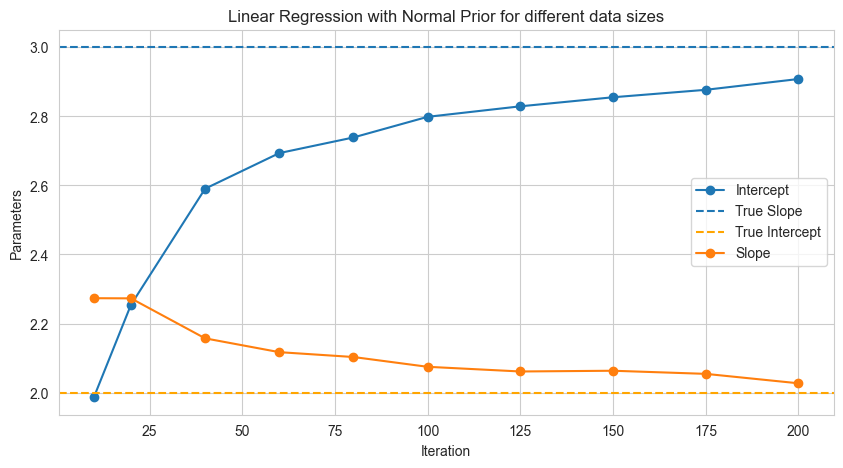

In [58]:
# Taking varaible size of data and plotting the values of MAP parameters
np.random.seed(123)
slope = 3
intercept = 2

Ns = [10, 20, 40, 60, 80, 100, 125, 150, 175, 200]

def get_MAP(N, lr = 0.005, No = 200):
    X = np.linspace(0, 1, N)
    noise = np.random.normal(0, 0.05, N)
    y = slope * X + intercept + noise

    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)

    def log_func(x):
        return -( -0.5*torch.sum((y_tensor - x[0]*X_tensor - x[1])**2) - 0.5*torch.sum(x[0]**2 + x[1]**2) )

    x = torch.tensor([0.5, 0.5], requires_grad=True)

    # 0.01 falied for N = 175
    optimizer = optim.SGD([x], lr = lr)  
                  
    xhist = torch.zeros((No, 2))
    for i in range(No):          
        xhist[i] = x.detach()   # Record the parameter value
        optimizer.zero_grad()   # Zero out gradients
        loss = log_func(x)      # Compute the loss
        loss.backward()         # Compute gradients
        optimizer.step()        # Update the parameter using the gradients

    return x

xvals = torch.zeros((len(Ns), 2))
for i, n in enumerate(Ns):
    x = get_MAP(n)
    xvals[i] = x.detach()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(np.array(Ns), xvals[:, 0], 'o-', label= "Intercept"); ax.set_xlabel('Number of Data Points')
ax.axhline(slope, linestyle = '--', label = "True Slope")
ax.axhline(intercept, linestyle = '--', color = "orange", label = "True Intercept")
ax.plot(np.array(Ns), xvals[:, 1], 'o-', label= "Slope"); ax.set_xlabel('Iteration'); ax.set_ylabel('Parameters')
ax.legend()
ax.set_title('Linear Regression with Normal Prior for different data sizes')
plt.show()


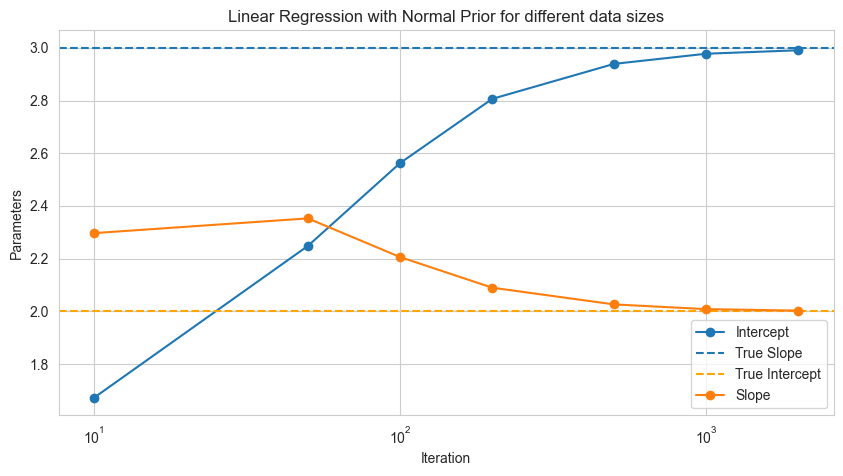

In [66]:
Ns2 = [10, 50, 100, 200, 500, 1000, 2000, 4000, 8000, 10000]

xvals = torch.zeros((len(Ns2), 2))
for i, n in enumerate(Ns2):
    x = get_MAP(n, lr = 0.0005, No = 400)
    xvals[i] = x.detach()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(np.array(Ns2), xvals[:, 0], 'o-', label= "Intercept"); ax.set_xlabel('Number of Data Points')
ax.axhline(slope, linestyle = '--', label = "True Slope")
ax.axhline(intercept, linestyle = '--', color = "orange", label = "True Intercept")
ax.plot(np.array(Ns2), xvals[:, 1], 'o-', label= "Slope"); ax.set_xlabel('Iteration'); ax.set_ylabel('Parameters')
ax.legend()
ax.set_title('Linear Regression with Normal Prior for different data sizes')
ax.set_xscale("log")
plt.show()

In [67]:
print(xvals[:, 0]) # Why are these values nans?, exploded?

tensor([1.6713, 2.2481, 2.5625, 2.8063, 2.9392, 2.9777, 2.9908,    nan,    nan,
           nan])


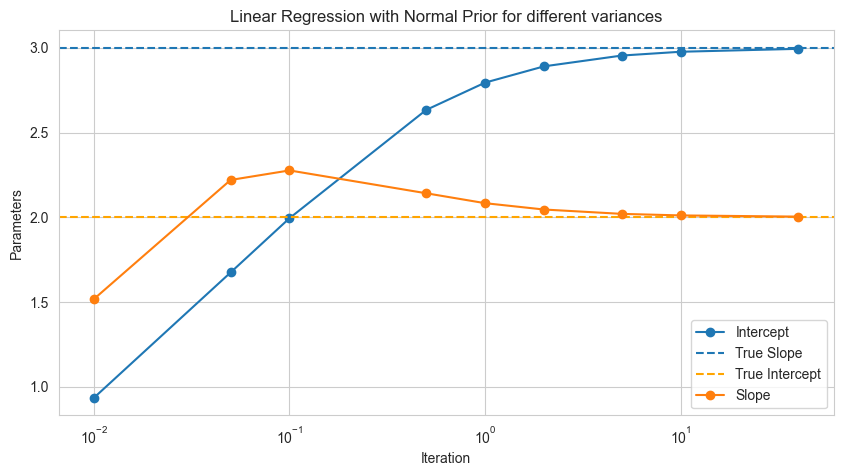

In [74]:
np.random.seed(123)
slope = 3
intercept = 2
N = 100
X = np.linspace(0, 1, N)
noise = np.random.normal(0, 0.05, N)
y = slope * X + intercept + noise

vars = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 10, 40]

def get_MAP_var(var, lr = 0.005, No = 200):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    y_tensor = torch.tensor(y, dtype=torch.float32)

    def log_func(x):
        return -( -0.5*torch.sum((y_tensor - x[0]*X_tensor - x[1])**2) - 0.5*(1/var)*torch.sum(x[0]**2 + x[1]**2) )

    x = torch.tensor([0.5, 0.5], requires_grad=True)
    optimizer = optim.SGD([x], lr = lr)  
                  
    xhist = torch.zeros((No, 2))
    for i in range(No):          
        xhist[i] = x.detach()   # Record the parameter value
        optimizer.zero_grad()   # Zero out gradients
        loss = log_func(x)      # Compute the loss
        loss.backward()         # Compute gradients
        optimizer.step()        # Update the parameter using the gradients

    return x

xvals = torch.zeros((len(vars), 2))
for i, n in enumerate(vars):
    x = get_MAP_var(n)
    xvals[i] = x.detach()

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(np.array(vars), xvals[:, 0], 'o-', label= "Intercept"); ax.set_xlabel('Vars')
ax.axhline(slope, linestyle = '--', label = "True Slope")
ax.axhline(intercept, linestyle = '--', color = "orange", label = "True Intercept")
ax.plot(np.array(vars), xvals[:, 1], 'o-', label= "Slope"); ax.set_xlabel('Iteration'); ax.set_ylabel('Parameters')
ax.legend()
ax.set_title('Linear Regression with Normal Prior for different variances')
ax.set_xscale("log")
plt.show()

**Prior:**

A laplace distribution with mean 0 and scale 1.

\begin{align}
p(\theta) &= \mathcal{L}(\theta|0, 1) = \frac{1}{2} exp(-\frac{|x-0|}{1})  \\
log(p(\theta)) &= -\frac{1}{1} \sum_{i=1}^{N} |\theta_i| \\
\end{align}

**Posterior:**

\begin{align}
p(\theta|y, x) &= \frac{p(y|x, \theta) p(\theta)}{p(y|x)} \\
log(p(\theta|y, x)) & \propto log(p(y|x, \theta)) + log(p(\theta)) \\
log(p(\theta|y, x)) & \propto -\frac{1}{2 } (y - X\theta)^T (y - X\theta) -\sum_{i=1}^{N} |\theta_i|  \\
\end{align}


Optimized x: tensor([2.9032, 2.0411], requires_grad=True) Loss:  5.148142337799072


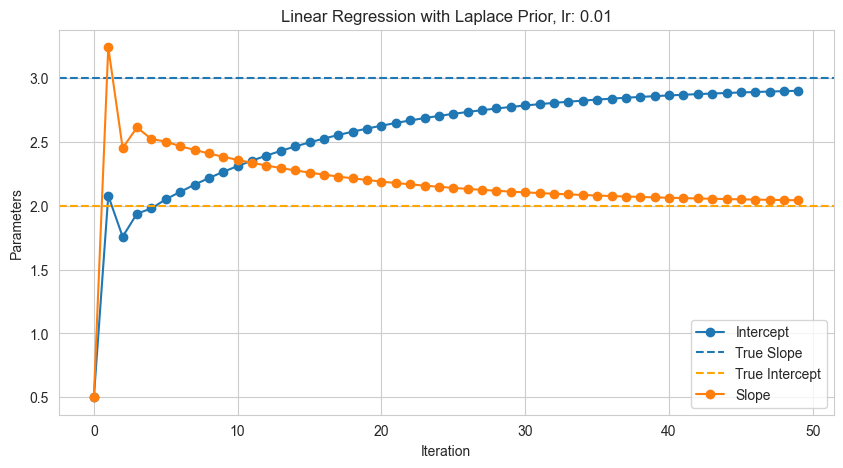

In [76]:
# Posterior function to be minimized for laplace dist
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

def log_func(x):
    return -( -0.5*torch.sum((y_tensor - x[0]*X_tensor - x[1])**2) - torch.sum(torch.abs(x[0]) + torch.abs(x[1])) )
    # return -torch.log((x**4)*((1-x)**6)) - torch.log((x**1)*((1-x)**2))

# Initialize the variable to optimize (parameter)
x = torch.tensor([0.5, 0.5], requires_grad=True)

# Define the optimizer (using stochastic gradient descent)
lr = 0.01
optimizer = optim.SGD([x], lr = lr)  # lr is the learning rate

N = 50                       # Number of optimization steps
xhist = torch.zeros((N, 2))

# Perform optimization
for i in range(N):          
    xhist[i] = x.detach()   # Record the parameter value
    optimizer.zero_grad()   # Zero out gradients
    loss = log_func(x)      # Compute the loss
    loss.backward()         # Compute gradients
    optimizer.step()        # Update the parameter using the gradients

# The optimized value of x is the minimum point of the function
min_value = log_func(x).item()

print("Optimized x:", x, "Loss: ", min_value)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(xhist[:, 0], 'o-', label= "Intercept"); ax.set_xlabel('Iteration')
ax.axhline(slope, linestyle = '--', label = "True Slope")
ax.axhline(intercept, linestyle = '--', color = "orange", label = "True Intercept")
ax.plot(xhist[:, 1], 'o-', label= "Slope"); ax.set_xlabel('Iteration'); ax.set_ylabel('Parameters')
ax.legend()
ax.set_title('Linear Regression with Laplace Prior, lr: '+ str(lr))
plt.show()

## Q4 [1.5 marks]

Generate a classification dataset with the following code (4.1). 

Find the MAP estimate for the parameters of logistic regression. Assume Normal prior with mean=0 and variance=0.1 for all parameters. 

Visualize the MLE and MAP classification boundaries. What do you observe? [1.5 marks]

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=100, centers=2, n_features=2, random_state=0, cluster_std=0.8
)

In [84]:
X_tensor = torch.tensor(X, dtype=torch.float32)
print(X_tensor.shape)

torch.Size([2])


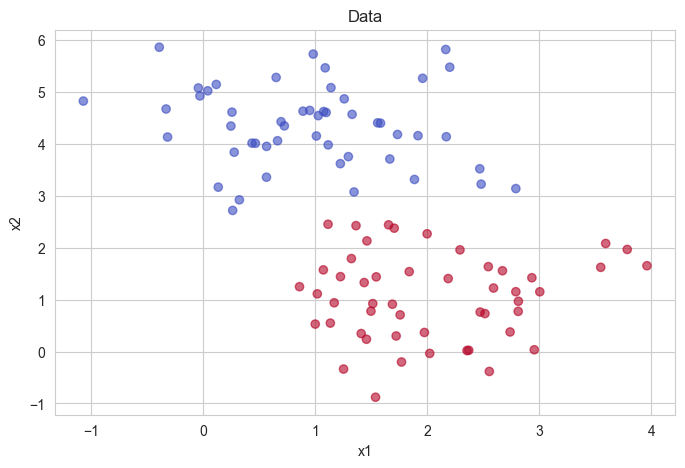

In [3]:
# Plot the data
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", alpha=0.6)
ax.set_title("Data")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
plt.show()

Finding a Map estimate for Logistic Reeegression with prior as Normal distribution with mean=0 and variance=0.1 for all parameters.

**Model:** (likelihood)

Here, the model likelihood is a Bernolli function

\begin{align}
p(y|x, \theta) &= \prod_{i=1}^{N} \sigma(x_i^T \theta^T)^{y_i} (1 - \sigma(x_i^T \theta^T))^{1 - y_i} \\
log(p(y|x, \theta)) &= \sum_{i=1}^{N} y_i log(\sigma(x_i^T \theta^T)) + (1 - y_i) log(1 - \sigma(x_i^T \theta^T)) \\
log(p(y|x, \theta)) &= \sum_{i=1}^{N} y_i log(\frac{1}{1 + exp(-x_i^T \theta^T)}) + (1 - y_i) log(1 - \frac{1}{1 + exp(-x_i^T \theta^T)}) \\
\end{align}

**Prior:**

A normal distribution with mean 0 and variance 0.1.

\begin{align}
p(\theta) &= \mathcal{N}(\theta|0, 0.1) \\
log(p(\theta)) &= -\frac{1}{2} \sum_{i=1}^{N} \frac{\theta_i^2}{0.1} \\
log(p(\theta)) &= -\frac{1}{2} \theta^T \theta
\end{align}

**Posterior:**

\begin{align}
p(\theta|y, x) &= \frac{p(y|x, \theta) p(\theta)}{p(y|x)} \\
log(p(\theta|y, x)) & \propto log(p(y|x, \theta)) + log(p(\theta)) \\
log(p(\theta|y, x)) & \propto \sum_{i=1}^{N} y_i log(\sigma (x_i^T \theta^T)) + (1 - y_i) log(1 - \sigma(x_i^T \theta^T)) -\frac{1}{2} \theta^T \theta \\
log(p(\theta|y, x)) & \propto \sum_{i=1}^{N} y_i log(\frac{1}{1 + exp(-x_i^T \theta^T)}) + (1 - y_i) log(1 - \frac{1}{1 + exp(-x_i^T \theta^T)}) -\frac{1}{2} \theta^T \theta \\
\end{align}

In [89]:
import torch

# Input tensor
x = torch.tensor([0.0, 1.0, -1.0, 2.0])

# Apply sigmoid function
sigmoid_output = torch.sigmoid(x)

print("Input Tensor:", x)
print("Sigmoid Output:", sigmoid_output)

Input Tensor: tensor([ 0.,  1., -1.,  2.])
Sigmoid Output: tensor([0.5000, 0.7311, 0.2689, 0.8808])


Optimized x: tensor([ 1.7220,  1.5703, -1.6827], requires_grad=True) Loss:  15.351844787597656


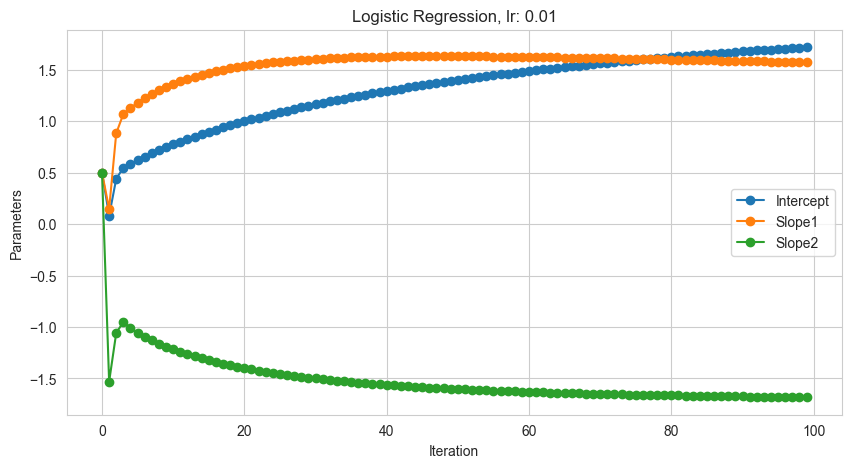

In [8]:
# Posterior function to be minimized for laplace dist
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

def log_func(x):
    return -torch.sum( y_tensor*torch.log(torch.sigmoid(x[0]+torch.matmul(X_tensor,x[1:])))  + (1-y_tensor)*torch.log(1-
                                torch.sigmoid(x[0]+torch.matmul(X_tensor,x[1:]))) ) + 0.5*torch.sum(x**2)

# Initialize the variable to optimize (parameter)
x = torch.tensor([0.5, 0.5, 0.5], requires_grad=True)

# Define the optimizer (using stochastic gradient descent)
lr = 0.01
optimizer = optim.SGD([x], lr = lr)  # lr is the learning rate

N = 100                       # Number of optimization steps
xhist = torch.zeros((N, 3))

# Perform optimization
for i in range(N):          
    xhist[i] = x.detach()   # Record the parameter value
    optimizer.zero_grad()   # Zero out gradients
    loss = log_func(x)      # Compute the loss
    loss.backward()         # Compute gradients
    optimizer.step()        # Update the parameter using the gradients

# The optimized value of x is the minimum point of the function
min_value = log_func(x).item()

print("Optimized x:", x, "Loss: ", min_value)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(xhist[:, 0], 'o-', label= "Intercept"); ax.set_xlabel('Iteration')
ax.plot(xhist[:, 1], 'o-', label= "Slope1")
# ax.axhline(slope, linestyle = '--', label = "True Slope")
# ax.axhline(intercept, linestyle = '--', color = "orange", label = "True Intercept")
ax.plot(xhist[:, 2], 'o-', label= "Slope2"); ax.set_xlabel('Iteration'); ax.set_ylabel('Parameters')
ax.legend()
ax.set_title('Logistic Regression, lr: '+ str(lr))
plt.show()

Optimized x: tensor([ 2.5861,  2.0617, -2.3139], requires_grad=True) Loss:  8.761890411376953


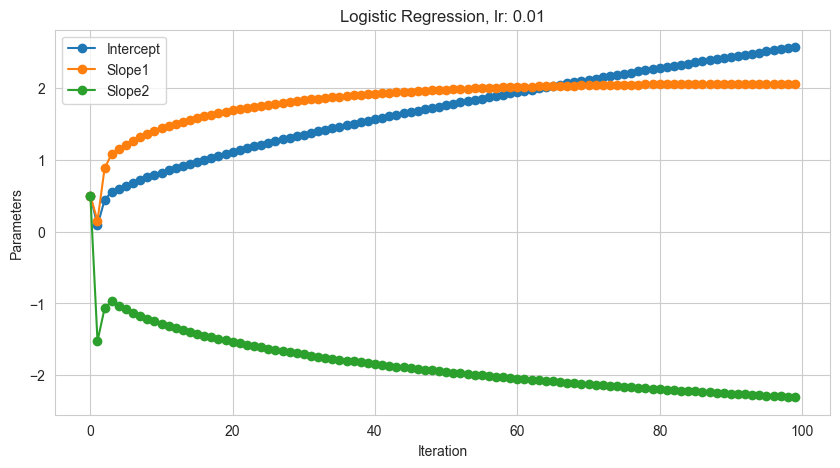

In [7]:
# Posterior function to be minimized for laplace dist
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

def log_func_Ml(x):
    return -torch.sum( y_tensor*torch.log(torch.sigmoid(x[0]+torch.matmul(X_tensor,x[1:])))  + (1-y_tensor)*torch.log(1-
                                torch.sigmoid(x[0]+torch.matmul(X_tensor,x[1:]))) ) #+ 0.5*torch.sum(x**2)

# Initialize the variable to optimize (parameter)
x_ml = torch.tensor([0.5, 0.5, 0.5], requires_grad=True)

# Define the optimizer (using stochastic gradient descent)
lr = 0.01
optimizer = optim.SGD([x_ml], lr = lr)  # lr is the learning rate

N = 100                       # Number of optimization steps
xhist_ml = torch.zeros((N, 3))

# Perform optimization
for i in range(N):          
    xhist_ml[i] = x_ml.detach()   # Record the parameter value
    optimizer.zero_grad()   # Zero out gradients
    loss = log_func_Ml(x_ml)      # Compute the loss
    loss.backward()         # Compute gradients
    optimizer.step()        # Update the parameter using the gradients

# The optimized value of x is the minimum point of the function
min_value = log_func_Ml(x_ml).item()

print("Optimized x:", x_ml, "Loss: ", min_value)
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(xhist_ml[:, 0], 'o-', label= "Intercept"); ax.set_xlabel('Iteration')
ax.plot(xhist_ml[:, 1], 'o-', label= "Slope1")
# ax.axhline(slope, linestyle = '--', label = "True Slope")
# ax.axhline(intercept, linestyle = '--', color = "orange", label = "True Intercept")
ax.plot(xhist_ml[:, 2], 'o-', label= "Slope2"); ax.set_xlabel('Iteration'); ax.set_ylabel('Parameters')
ax.legend()
ax.set_title('Logistic Regression, lr: '+ str(lr))
plt.show()

MAP estimate:  [ 1.7220181  1.5702853 -1.6826881]
ML estimate:  [ 2.5861082  2.0616734 -2.3138885]


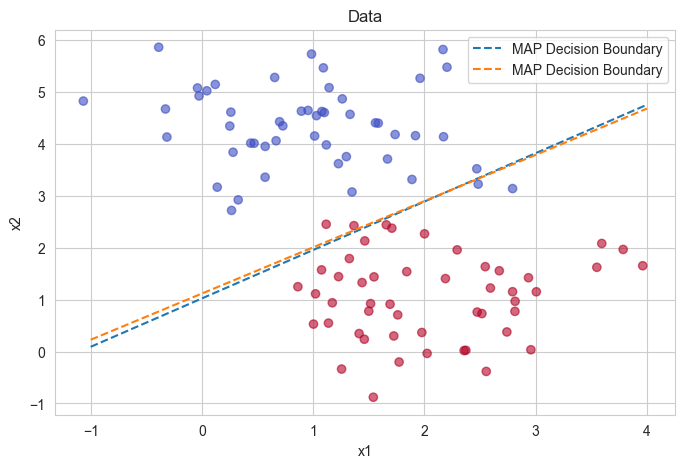

In [9]:
x = x.detach().numpy()
print("MAP estimate: ",x)
x_ml = x_ml.detach().numpy()
print("ML estimate: ",x_ml)
# Plot the data
xs = np.linspace(-1, 4, 100)
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", alpha=0.6)
ax.plot(xs, -(x[0]+x[1]*xs)/x[2], linestyle = "--", label = "MAP Decision Boundary")
ax.plot(xs, -(x_ml[0]+x_ml[1]*xs)/x_ml[2], linestyle = "--", label = "MAP Decision Boundary")
ax.set_title("Data")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.legend()
plt.show()